# Problem Statement - Comp-active Dataset ( Linear Regression )

## Context

The data set provided to you is the data set of a Café Chain for one of its restaurants. Do a thorough analysis of the data and come up with the following analysis. The owner of the restaurant wants you to use this data to come up with a set of recommendations that can help his Café Chain increase its revenues. He is able to provide you with a data set for POS (point of sale data) for one of his chains.




In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
# drive already mounted if mounted

Mounted at /content/drive


## Import Dataset

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Python Course/Cafe_Data_MRA.xlsx') ##  Complete the code to read the data

In [7]:
df.shape

(145830, 10)

### View the first and last 5 rows of the dataset

In [8]:
df.head(5) ##  Complete the code to view top 5 rows of the data

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [9]:
df.tail(5) ##  Complete the code to view last 5 rows of the data

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
145825,2010-05-22,N0028716,ZINZI WHITE (GLS),21:43:55,2,150.0,78.0,0.0,378.0,LIQUOR
145826,2010-04-27,N0028343,ZINZI WHITE (GLS),20:52:11,2,150.0,78.0,0.0,378.0,LIQUOR
145827,2010-05-28,N0028835,ZINZI WHITE (GLS),01:03:37,3,150.0,117.0,0.0,567.0,LIQUOR
145828,2010-04-30,N0028399,ZINZI WHITE (GLS),23:44:37,1,150.0,39.0,0.0,189.0,LIQUOR
145829,2010-07-09,N0029472,ZINZI WHITE (BTL),00:31:51,1,700.0,182.0,0.0,882.0,LIQUOR


### Understand the shape of the dataset

In [10]:
df.shape ## Complete the code to get the shape of data

(145830, 10)

### Check the data types of the columns for the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 11.1+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.00000,19.55969,53.35380,0.00000,2.00000,7.00000,20.00000,1845.00000
lwrite,8192.00000,13.10620,29.89173,0.00000,0.00000,1.00000,10.00000,575.00000
scall,8192.00000,2306.31824,1633.61732,109.00000,1012.00000,2051.50000,3317.25000,12493.00000
sread,8192.00000,210.47998,198.98015,6.00000,86.00000,166.00000,279.00000,5318.00000
swrite,8192.00000,150.05823,160.47898,7.00000,63.00000,117.00000,185.00000,5456.00000
fork,8192.00000,1.88455,2.47949,0.00000,0.40000,0.80000,2.20000,20.12000
exec,8192.00000,2.79200,5.21246,0.00000,0.20000,1.20000,2.80000,59.56000
rchar,8088.00000,197385.72836,239837.49353,278.00000,34091.50000,125473.50000,267828.75000,2526649.00000
wchar,8177.00000,95902.99278,140841.70791,1498.00000,22916.00000,46619.00000,106101.00000,1801623.00000
pgout,8192.00000,2.28532,5.30704,0.00000,0.00000,0.00000,2.40000,81.44000


In [14]:
# Checking  columns
df.columns

Index(['Date', 'Bill Number ', 'Item Desc', 'Time', 'Quantity', 'Rate', 'Tax',
       'Discount', 'Total', 'Category'],
      dtype='object')

In [15]:
# convert time column into datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Time'].dtype

dtype('<M8[ns]')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  datetime64[ns]
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 11.1+ MB


In [20]:
columns_to_count = ["Bill Number "]

for col in columns_to_count:
    counts = df[col].value_counts().reset_index()
    counts.columns = ["Bill Number ", "value_counts"]
    print(f"DataFrame for {col}")
counts

DataFrame for Bill Number 


,Bill Number,value_counts
0,G0490530,23
1,G0518006,23
2,G0489943,21
3,G0526679,19
4,G0495644,18
...,...,...
69977,G0472334,1
69978,G0472336,1
69979,G0472337,1
69980,G0472343,1


In [21]:
columns_to_count = ["Item Desc"]

for col in columns_to_count:
    Item_desc = df[col].value_counts().reset_index()
    Item_desc.columns = ["Item Desc", "value_counts"]
    print(f"DataFrame for {col}:\n")
Item_desc

DataFrame for Item Desc:



,Item Desc,value_counts
0,NIRVANA HOOKAH SINGLE,8553
1,MINT FLAVOUR SINGLE,5817
2,CAPPUCCINO,5495
3,GREAT LAKES SHAKE,4895
4,SAMBUCA,4425
...,...,...
575,UDAIPUR LILY,1
576,ADD BUTTERED TOAST,1
577,DECAFFINATE COFFEE FRAPPE,1
578,INDIA KINGS OCEAN BLUE,1


In [22]:
columns_to_count = ["Category"]
for col in columns_to_count:
    Category = df[col].value_counts().reset_index()
    Category.columns = ["Category", "value_counts"]
    print(f"DataFrame for {col}:\n")
Category

DataFrame for Category:



,Category,value_counts
0,FOOD,57023
1,BEVERAGE,43573
2,TOBACCO,36496
3,LIQUOR,6200
4,MISC,1187
5,WINES,809
6,MERCHANDISE,487
7,LIQUOR & TOBACCO,54
8,LIQUOR,1


In [13]:
# checking for duplicate values
df.duplicated().sum()

680

In [23]:
#remove duplicates
df.drop_duplicates(inplace= True)
df.shape

(145150, 10)

In [24]:
# check duplicate once again
df.isnull().sum().sum()

0

In [25]:
df['Category'] = df['Category'].str.strip()
df.Category.value_counts()

,count
Category,
FOOD,56658
BEVERAGE,43513
TOBACCO,36294
LIQUOR,6200
MISC,1160
WINES,805
MERCHANDISE,473
LIQUOR & TOBACCO,47


<ipython-input-52-731b4625e917>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=category_counts, y='Category', x='Count',palette=clrs)


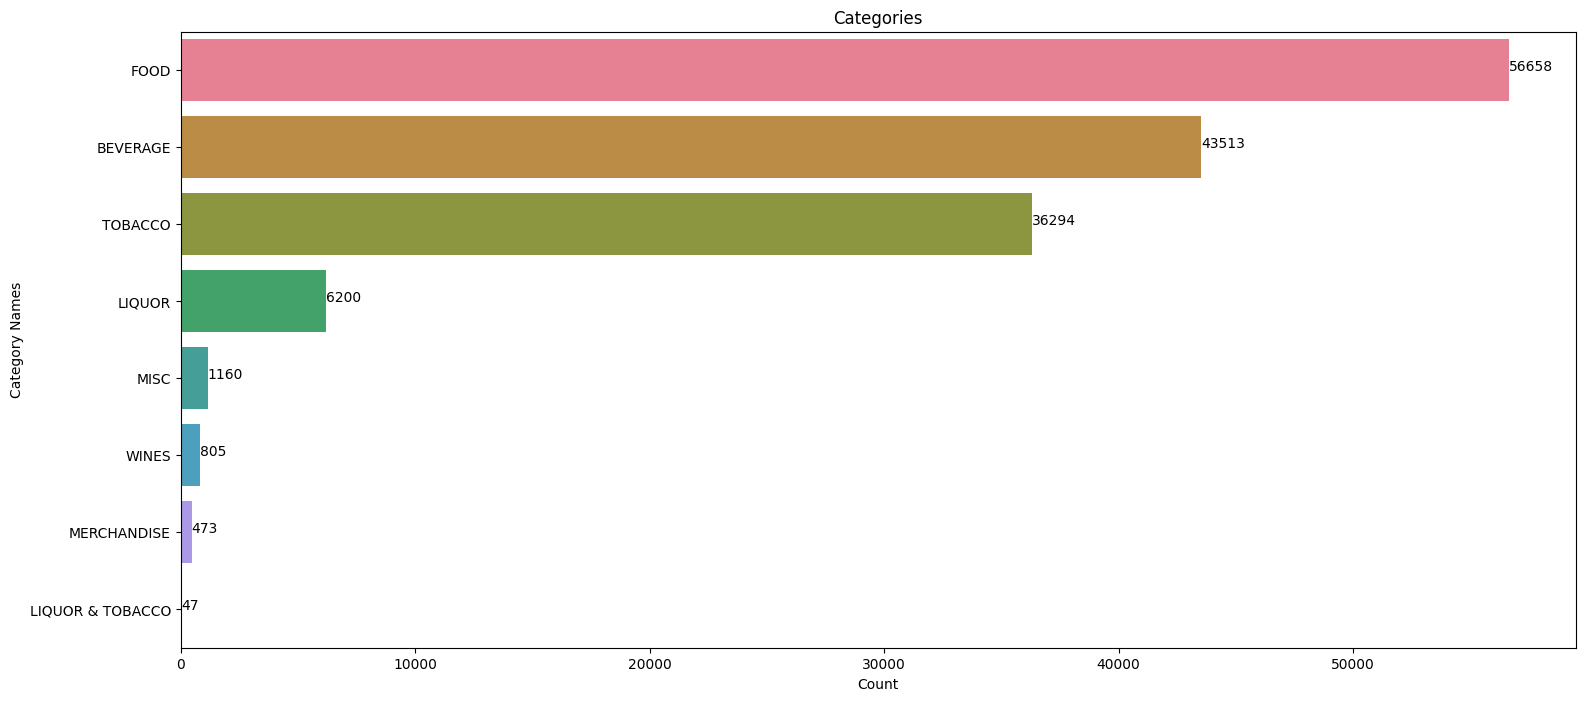

In [52]:
# Category wise Count
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts = category_counts.sort_values(by='Count', ascending=False)
plt.figure(figsize=(18, 8))
clrs = sns.color_palette("husl", len(category_counts)) # Example palette, choose as needed
ax = sns.barplot(data=category_counts, y='Category', x='Count',palette=clrs)
for index, row in category_counts.iterrows():
    ax.text(row['Count'], index, row['Count'], color='black', ha="left")
plt.title('Categories')
plt.xlabel('Count')
plt.ylabel('Category Names')

plt.show();

In [27]:
df_stat= df.describe()
df_stat

,Date,Time,Quantity,Rate,Tax,Discount,Total
count,145150,145150,145150.000000,145150.000000,145150.00000,145150.000000,145150.000000
mean,2010-10-04 12:26:23.355149568,1900-01-01 16:39:13.400213760,1.121826,161.727783,48.93175,0.095307,224.971683
min,2010-04-01 00:00:00,1900-01-01 00:00:01,1.000000,0.010000,0.00000,0.000000,0.010000
25%,2010-07-10 00:00:00,1900-01-01 14:48:49,1.000000,95.000000,22.56000,0.000000,117.560000
50%,2010-10-07 00:00:00,1900-01-01 18:17:09.500000,1.000000,125.000000,32.06000,0.000000,167.060000
75%,2011-01-01 00:00:00,1900-01-01 21:02:14,1.000000,225.000000,72.00000,0.000000,315.000000
max,2011-03-31 00:00:00,1900-01-01 23:59:57,30.000000,2100.000000,2731.25000,825.000000,14231.250000
std,NaN,NaN,0.478249,102.213514,40.28672,3.728524,165.052799


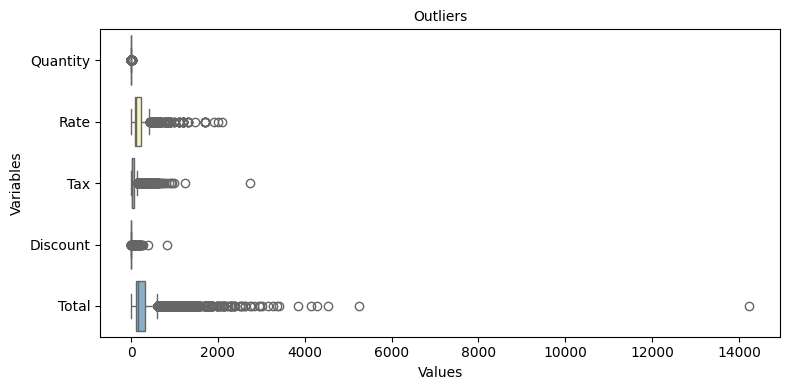

In [28]:
# checking Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, orient='h', palette='Set3')
plt.title('Outliers', fontsize=10)
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()

plt.show();

In [29]:
# check non unique
print(df.nunique())

Date              365
Bill Number     69982
Item Desc         580
Time            36200
Quantity           20
Rate              134
Tax               445
Discount          111
Total             470
Category            8
dtype: int64


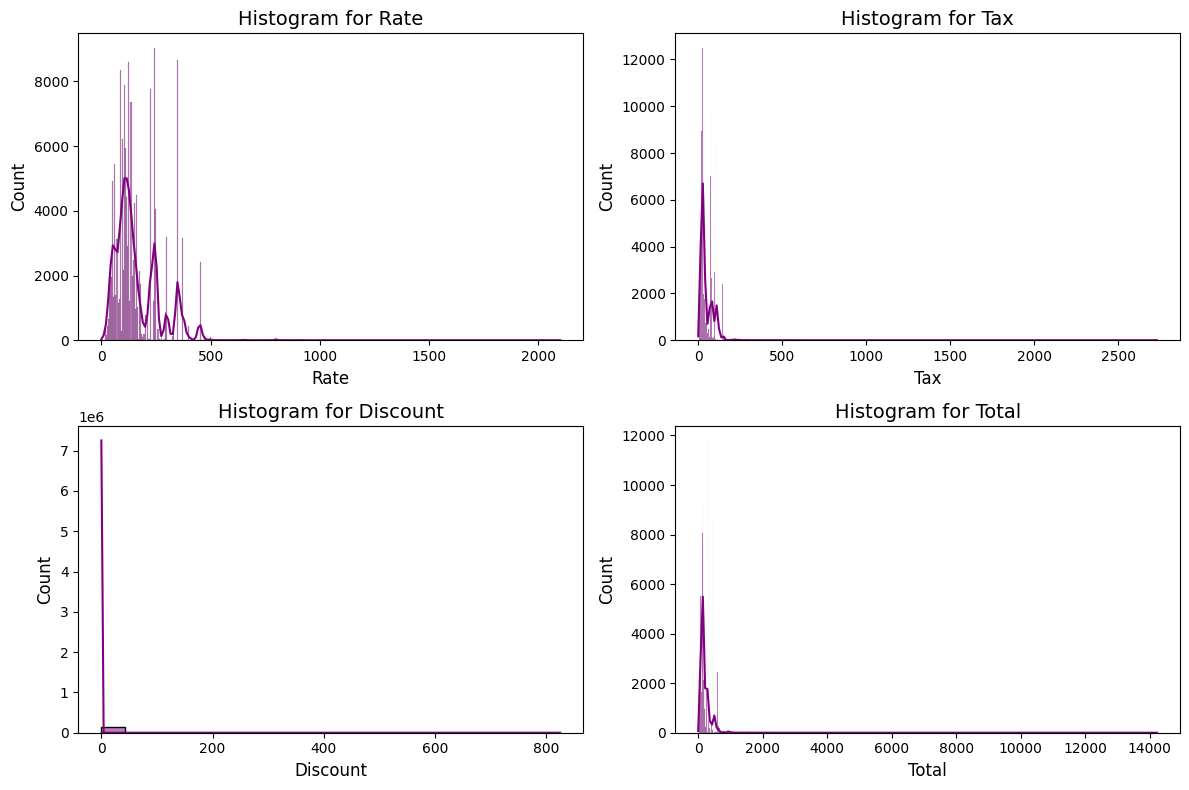

In [30]:
# Filter columns with float data types
float_columns = df.select_dtypes(include=['float64']).columns
num_plots = len(float_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
for i, (column, ax) in enumerate(zip(float_columns, axes.flatten())):
    sns.histplot(df[column], kde=True, color='purple', ax=ax)
    ax.set_title(f'Histogram for {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(labelsize=10)

for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show();

In [31]:
df.shape

(145150, 10)

In [32]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=fad71bd3cc6c33d532f870f39077b6352bfbe594d5b5a0de5337157068fc02f8
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [33]:
from apyori import apriori

In [34]:
# Checking  columns
df.columns

Index(['Date', 'Bill Number ', 'Item Desc', 'Time', 'Quantity', 'Rate', 'Tax',
       'Discount', 'Total', 'Category'],
      dtype='object')

In [35]:
df['Item_ID'] = pd.factorize(df['Item Desc'])[0]
transactions = df.groupby('Bill Number ')['Item_ID'].apply(list).tolist()
knime_df = pd.DataFrame({'Sno': ['s' + str(i) for i in range(1, len(transactions) + 1)],
                         'Billing_Sets': [' '.join(map(str, transaction)) for transaction in transactions]})

In [36]:
knime_df.head(10)

,Sno,Billing_Sets
0,s1,28
1,s2,85
2,s3,17 14 401 527
3,s4,0 79
4,s5,79
5,s6,0 4 73
6,s7,0 1 31
7,s8,2 78
8,s9,0 545
9,s10,2 3


In [37]:
knime_df.shape

(69982, 2)

In [38]:
print(knime_df.nunique())

Sno             69982
Billing_Sets    24318
dtype: int64


In [39]:
knime_df.to_csv('knime_dataset.csv', index=False)

In [40]:
knime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69982 entries, 0 to 69981
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sno           69982 non-null  object
 1   Billing_Sets  69982 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [41]:
columns_to_count = ["Billing_Sets"]

for col in columns_to_count:
    counts = knime_df[col].value_counts().reset_index()
    counts.columns = ["Billing_Sets", "value_counts"]
    print(f"DataFrame for {col}")
counts

DataFrame for Billing_Sets


,Billing_Sets,value_counts
0,79,3826
1,78,3505
2,82,1499
3,4,1405
4,74,1395
...,...,...
24313,320 79,1
24314,4 39 78 82,1
24315,24 49,1
24316,284 62,1


In [42]:
columns_to_count = ["Sno"]

for col in columns_to_count:
    counts = knime_df[col].value_counts().reset_index()
    counts.columns = ["Sno", "value_counts"]
    print(f"DataFrame for {col}")
counts

DataFrame for Sno


,Sno,value_counts
0,s1,1
1,s46654,1
2,s46660,1
3,s46659,1
4,s46658,1
...,...,...
69977,s23333,1
69978,s23334,1
69979,s23335,1
69980,s23336,1


In [44]:
knime_df['Item_ID'] = knime_df['Billing_Sets'].apply(lambda x: [int(item_id) for item_id in x.split()])
unique_item_ids = list(set([item_id for sublist in knime_df['Item_ID'] for item_id in sublist]))
item_mapping = df[df['Item_ID'].isin(unique_item_ids)].groupby('Item_ID').agg({
    'Item Desc': 'first',
    'Discount': 'first',
    'Total': 'first'
}).reset_index()
product_df = pd.DataFrame({
    'Product_No': item_mapping['Item_ID'],
    'Product_Name': item_mapping['Item Desc'],
    'Discount': item_mapping['Discount'],
    'Price': item_mapping['Total']
})
product_df['Product_No_Str'] = product_df['Product_No'].astype(str)
product_df.head(10)

,Product_No,Product_Name,Discount,Price,Product_No_Str
0,0,QUA MINERAL WATER(1000ML),0.0,61.88,0
1,1,MONSOON MALABAR (AULAIT),0.0,123.75,1
2,2,MASALA CHAI CUTTING,0.0,49.50,2
3,3,MOROCCAN MINT TEA,0.0,55.69,3
4,4,CAPPUCCINO,0.0,74.25,4
5,5,SUMATRA MANDHELING (REG),0.0,117.56,5
6,6,BRAZIL BOURBONSANTOS (AULAIT),0.0,142.31,6
7,7,LEMON ICED TEA,0.0,105.19,7
8,8,COUNTRY LEMONADE,0.0,105.19,8
9,9,MIAMI MELONS,0.0,105.19,9


In [45]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_No      580 non-null    int64  
 1   Product_Name    580 non-null    object 
 2   Discount        580 non-null    float64
 3   Price           580 non-null    float64
 4   Product_No_Str  580 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 22.8+ KB


In [46]:
product_df.to_csv('product_dataset.csv', index=False)